# Imports and settings

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils import *
from models import *

In [2]:
# Define mpmath precision
mp.mp.dps = 30
mp.mp.pretty = False

# Logistic map iterations

In [3]:
r = 2.9
x0 = .3
logistic_map(r, x0, mpf=False)

0.609

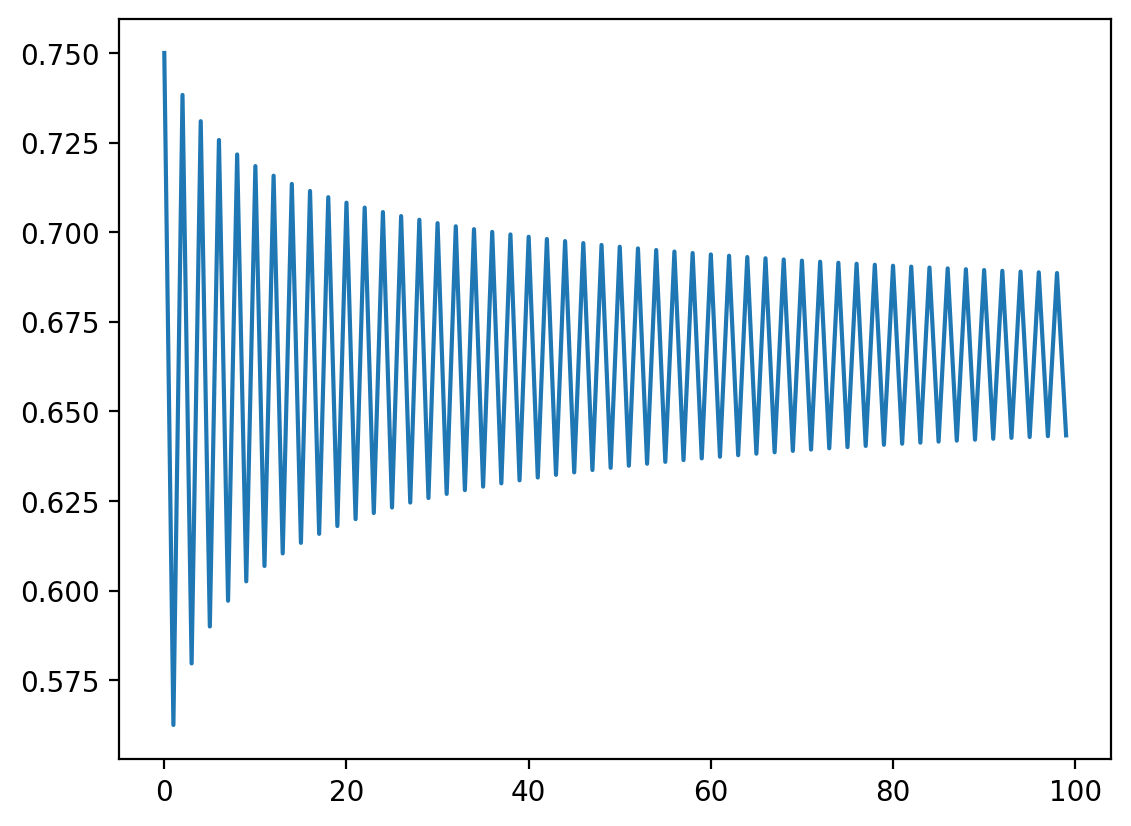

In [4]:
f = logistic_map
r = 3.
x0 = .5
N = 100

series = generate_series(f, r, x0, N)
plt.plot(series, marker='');

In [28]:
#from collections import Counter
#len(Counter(rounded_series))

2

# Count unique values in a series

2 unique values out of 900000


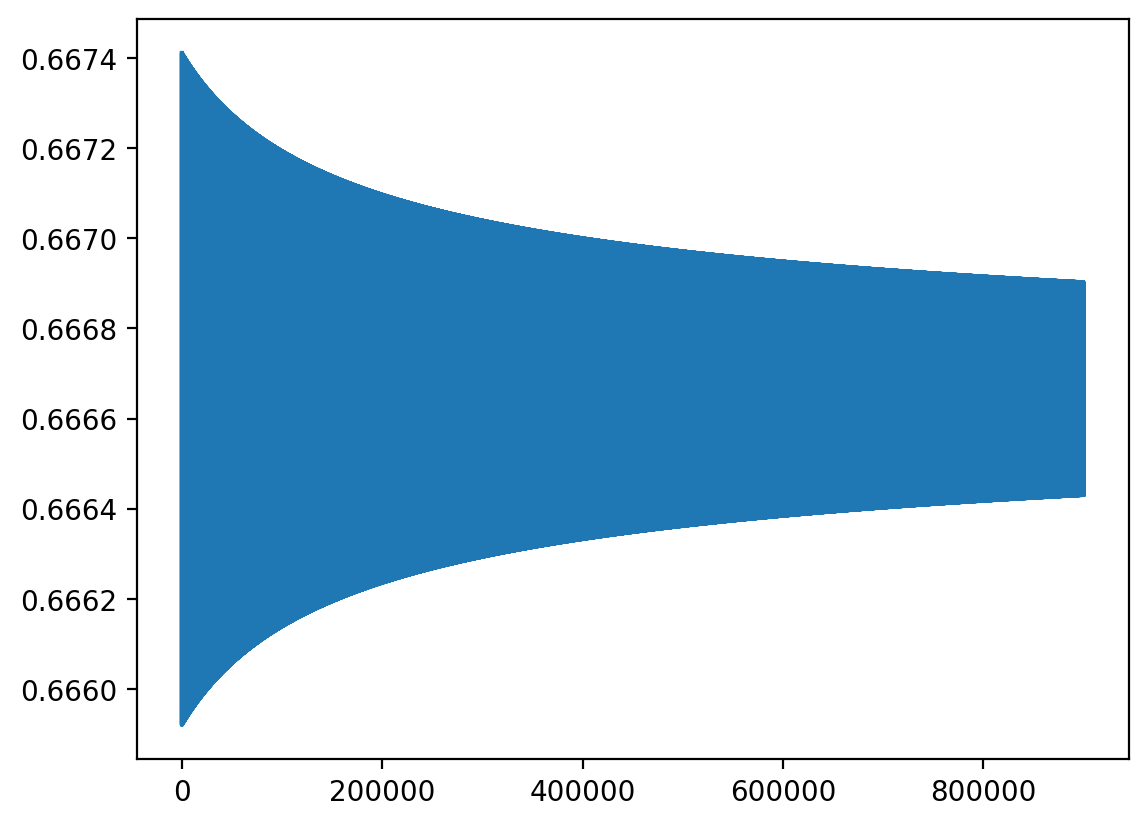

In [5]:
f = logistic_map
r = 3.
x0 = .5
N = 1e6

# Generate series and take last 10% of the data
series = generate_series(f, r, x0, int(N))[int(N * .1):]
plt.plot(series, marker='');

# Round values to eliminate numerical noise
rounded_series = np.round(series, 3)
#rounded_series = array_round(series, 3)

# Count unique values
unique_values = np.unique(rounded_series)
unique_count = len(unique_values)
print(f"{unique_count} unique values out of {len(series)}")

# Bifurcation points

In [60]:
f = logistic_map
x0 = .5

p_range = (3.569890000000052,3.6)
step_size = 1e-6
p_values = np.arange(*p_range, step_size)

N = 1e6
tolerance = 1e-4

print(f"series length = {p_values.size}\n")
print("param     unique count")
print("________________________")

for p in p_values:
             
    series = generate_series(f, p, x0, int(N))[-1000:]
    decimal = int(-np.log10(tolerance))
    rounded_series = np.round(series, decimal)
    unique_values = np.unique(rounded_series)
    unique_count = unique_values.size

    print(f"{p}           {unique_count}")

series length = 30110

param     unique count
________________________
3.569890000000052           64
3.569891000000052           64
3.5698920000000522           79
3.5698930000000524           86
3.5698940000000525           91
3.5698950000000527           95
3.569896000000053           97
3.569897000000053           98
3.569898000000053           101
3.5698990000000532           102
3.5699000000000534           102
3.5699010000000535           102
3.5699020000000536           102
3.569903000000054           103
3.569904000000054           103
3.569905000000054           104
3.569906000000054           105
3.5699070000000543           107
3.5699080000000545           108
3.5699090000000546           109


KeyboardInterrupt: 

In [6]:
lst = [3, 3.4494900000000173,3.5441000000000455, 3.564410000000046,3.5687600000000477,3.5697000000000507]
result = feigenbaum_constant(lst)
result

[4.75097769791653, 4.658296405712802, 4.668965517239454, 4.627659574455043]

In [26]:
f = logistic_map
x0 = .5

p = 1 # Initial parameter value
pmax = 3.4
step_size = 1e-1 # Initiial step size

N = 1e6
tolerance = 1e-3

print("i       p         unique count           step size")
print("_______________________________________________________")

prev_unique_count = 1
bifurcations = []

while p < pmax:

    series = generate_series(f, p, x0, int(N))[-1000:]
    decimal = int(-np.log10(tolerance))
    rounded_series = np.round(series, decimal)
    unique_values = np.unique(rounded_series)
    unique_count = unique_values.size

    print(f"{i}   {p}             {unique_count}             {step_size}")

    if unique_count > prev_unique_count:
        if unique_count == 2 * prev_unique_count:
            if step_size <= tolerance:
                bifurcations.append([p, i, step_size, unique_count])
                p += step_size
                prev_unique_count = unique_count
                i += 1
                continue
            else:
                p -= step_size
                step_size = step_size / 2
                prev_unique_count = unique_count
                i += 1
                continue
        else:
            p -= step_size
            step_size = step_size / 2
            prev_unique_count = unique_count
            i += 1
            continue
    else:
        p += step_size
        prev_unique_count = unique_count
        i += 1


i  param         unique count           step size
_______________________________________________________
75     1             1             0.1
76     1.1             1             0.1
77     1.2000000000000002             1             0.1
78     1.3000000000000003             1             0.1
79     1.4000000000000004             1             0.1
80     1.5000000000000004             1             0.1
81     1.6000000000000005             1             0.1
82     1.7000000000000006             1             0.1
83     1.8000000000000007             1             0.1
84     1.9000000000000008             1             0.1
85     2.000000000000001             1             0.1
86     2.100000000000001             1             0.1
87     2.200000000000001             1             0.1
88     2.300000000000001             1             0.1
89     2.4000000000000012             1             0.1
90     2.5000000000000013             1             0.1
91     2.6000000000000014         

In [24]:
bifurcations

[3.0000000000000018]

# Bifurcation digram

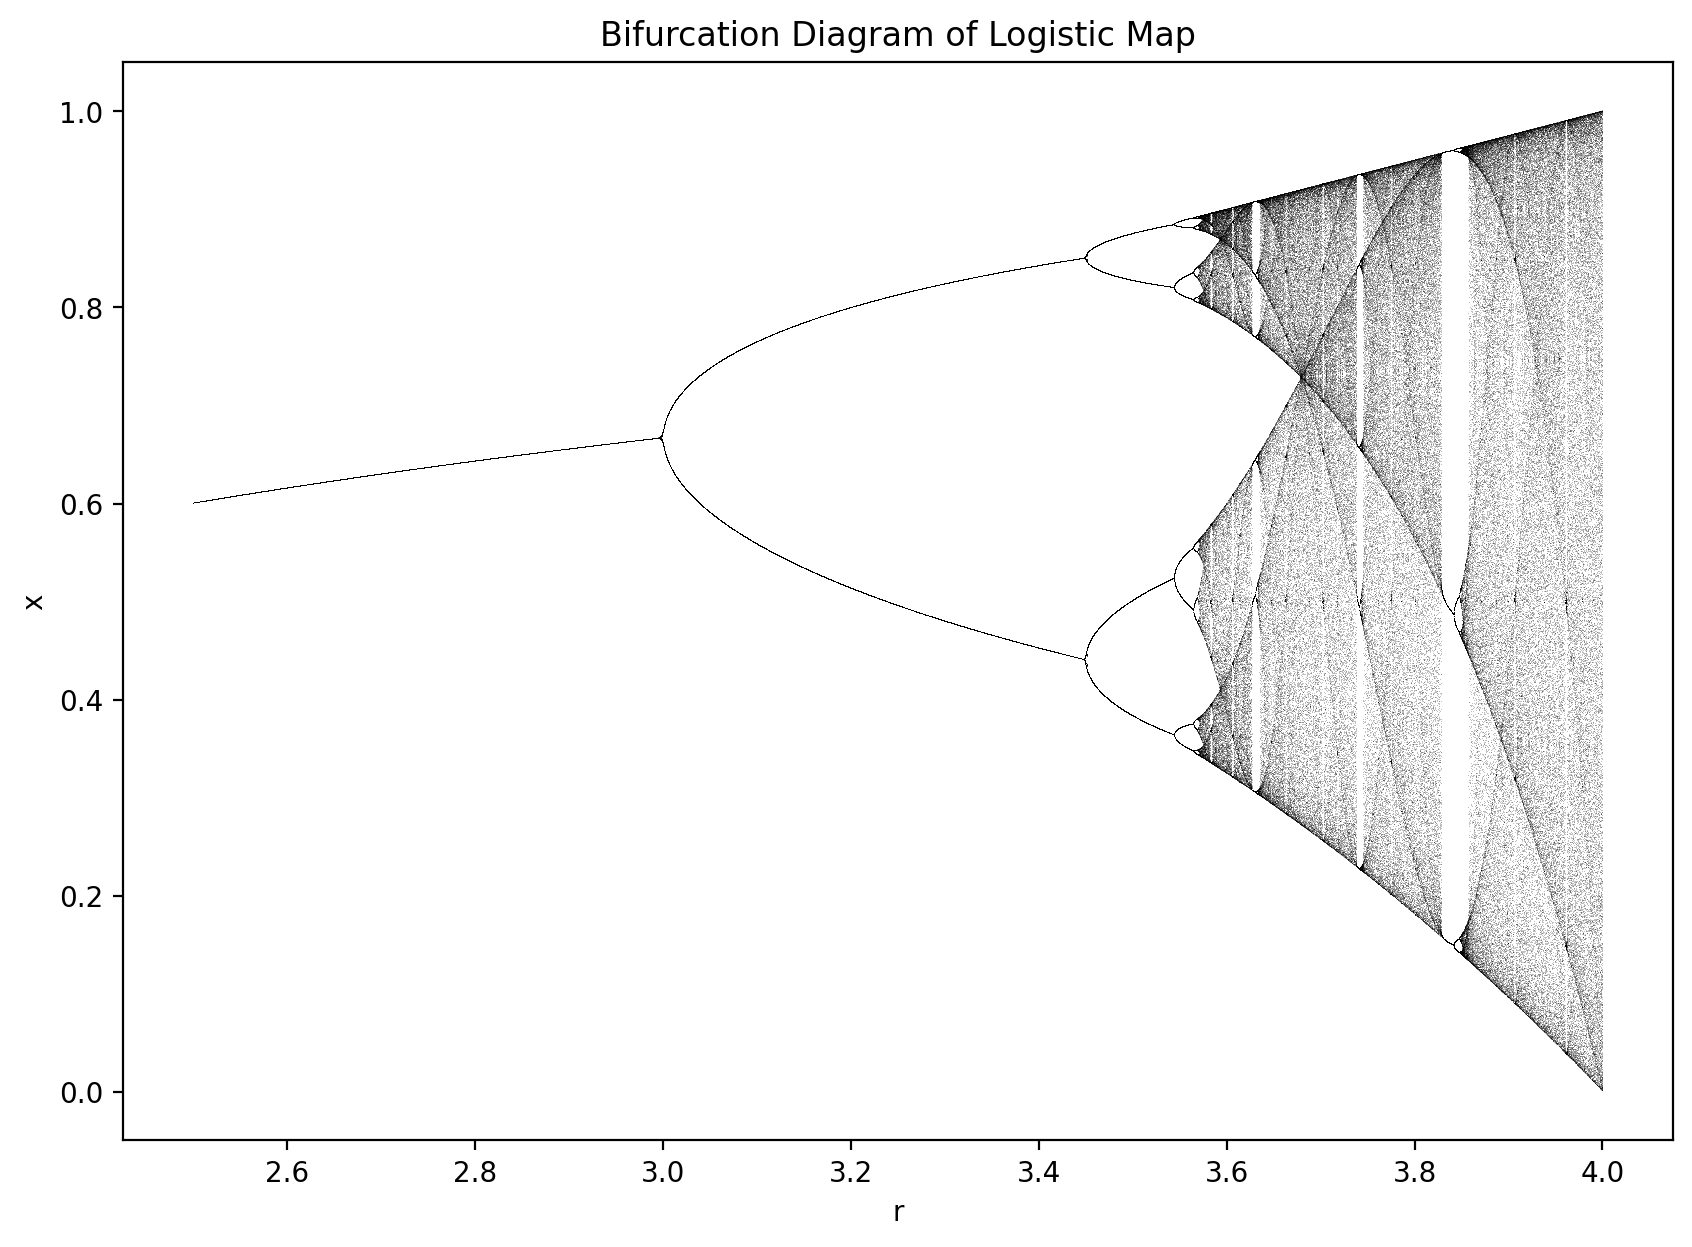

In [2]:
# Parameters for the bifurcation diagram
r_min = 2.5
r_max = 4.0
num_r = 10000     # Number of r values to evaluate
num_iterations = 1000   # Number of iterations for each r
last_iterations = 100   # Number of iterations to plot (after reaching steady state)

# Generate bifurcation data
r_output, x_values = bifurcation_diagram(r_min, r_max, num_r, num_iterations, last_iterations)

# Plotting the bifurcation diagram
plt.figure(figsize=(10, 7))
plt.plot(r_output, x_values, ',k', alpha=0.25)
plt.title("Bifurcation Diagram of Logistic Map")
plt.xlabel("r")
plt.ylabel("x")
plt.show()

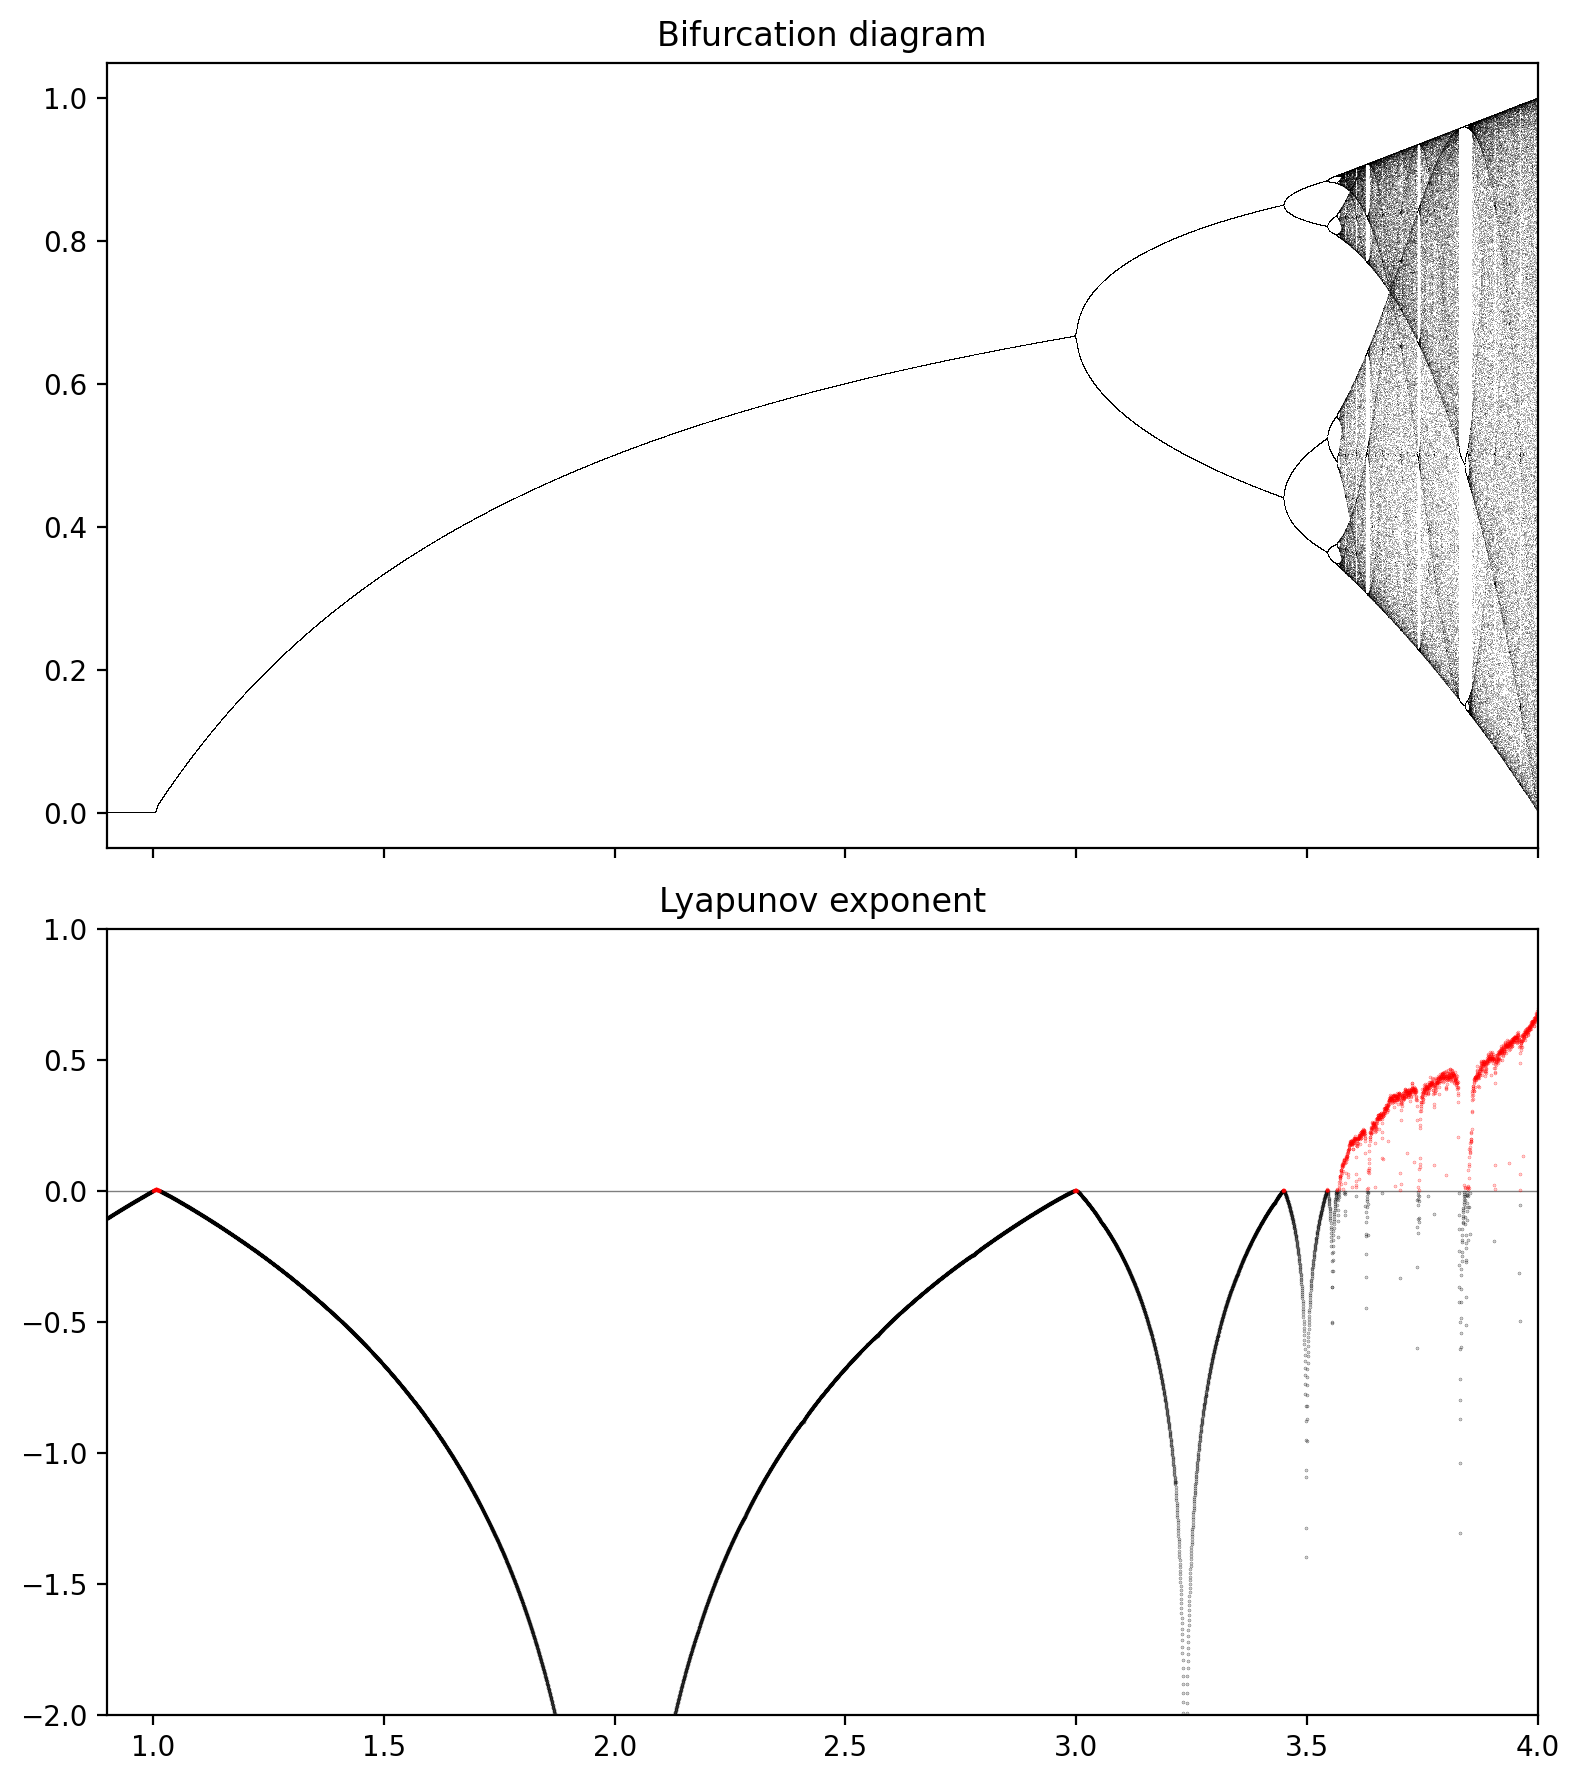

In [27]:
n = 10000
rrange = (.9, 4)
r = np.linspace(*rrange, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True, dpi=100)
for i in range(iterations):
    
    x = logistic_map(r, x)
    
    # compute the partial sum of the Lyapunov exponent
    lyapunov += np.log(abs(r - 2 * r * x))
    
    ### display the bifurcation diagram
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
        
ax1.set_xlim(*rrange)
ax1.set_title("Bifurcation diagram")


### display the Lyapunov exponent

# horizontal line
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# negative Lyapunov exponent
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.k', alpha=.5, ms=.5)

# positive Lyapunov exponent
ax2.plot(r[lyapunov >= 0],  lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_xlim(*rrange)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")

plt.tight_layout()

# Feigenbaum constant convergence

In [12]:
max_it = 13
max_it_j = 10
a1 = 1.0
a2 = 0.0
d1 = 3.2
a = 0.0

print (" i       d")
for i in range(2, max_it + 1):
    a = a1 + (a1 - a2) / d1
    for j in range(1, max_it_j + 1):
        x = 0.0
        y = 0.0
        for k in range(1, (1 << i) + 1):
            y = 1.0 - 2.0 * y * x
            x = a - x * x
        a = a - x / y
    d = (a1 - a2) / (a - a1)
    print("{0:2d}    {1:.8f}".format(i, d))
    d1 = d
    a2 = a1
    a1 = a

 i       d
 2    3.21851142
 3    4.38567760
 4    4.60094928
 5    4.65513050
 6    4.66611195
 7    4.66854858
 8    4.66906066
 9    4.66917155
10    4.66919515
11    4.66920026
12    4.66920098
13    4.66920537
